<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 7) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Chi-Square Test](#chisq)**
    - 2.1 - **[Chi-Square Test for Goodness of Fit](#goodness)**
    - 2.2 - **[Chi-Square Test for Independence](#ind)**
    - 2.3 - **[Chi-Square Test for Equality of Variance](#var)***

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="chisq"></a>
# 2. Chi-Square Test

It is a non-parametric test. `Non-parametric tests` do not require any assumptions on the parameter of the population from which the sample is taken. These tests can be applied to the ordinal/ nominal data. A non-parametric test can be performed on the data containing outliers.

The chi-square test statistic follows a Chi-square ($\chi^{2}$) distribution under the null hypothesis. It can be used to check the relationship between the categorical variables. 

Let us calculate the right-tailed $\chi^{2}$ values for different levels of significance ($\alpha$).

In [3]:
# let us find the χ2-values for different alpha values with 10 degrees of freedom

# create an empty dataframe to store the alpha and corresponding χ2-value
df_χ2 = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.25, 0.1, 0.05, 0.01] 

# use for loop to calculate the χ2-value for each alpha value
for i in range(len(alpha)):
    
    # use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha' to the parameter 'q'
    # pass the 10 degrees of freedom to the parameter 'df' 
    # use 'round()' to round-off the value to 2 digits
    chi_sq = np.abs(round(stats.chi2.isf(q = alpha[i], df = 10), 2))

    # create a dataframe using dictionary to store the alpha and corresponding χ2-value
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "χ2": chi_sq}, index = [i])

    # append the row to the dataframe 'df_χ2'
    df_χ2 = df_χ2.append(row)

# print the final dataframe
df_χ2

,alpha,χ2
0,0.25,12.55
1,0.10,15.99
2,0.05,18.31
3,0.01,23.21


Let us study the following tests:<br>
$\bullet$ Chi-square test for goodness of fit<br>
$\bullet$ Chi-square test for independence<br>
$\bullet$ Chi-square test for equality of variance

<a id="goodness"></a>
## 2.1 Chi-Square Test for Goodness of Fit

This test is used to compare the distribution of the categorical data with the expected distribution. 

<p style='text-indent:6em'> <strong> $H_{0}$: There is no significant difference between the observed and expected frequencies from the expected distribution</strong></p>
<p style='text-indent:6em'> <strong> $H_{1}$: There is a significant difference between the observed and expected frequencies from the expected distribution</strong></p>

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \sum_{i = 1}^{k}\frac{O_{i}^{2}}{E_{i}} - N$</strong></p>

Where, <br>
$O_{i}$: Observed frequency for category i <br>
$E_{i}$: Expected frequency for category i<br>
$N$: Total number of observations

Under $H_{0}$, the test statistic follows a chi-square distribution with $(k - p - 1)$ degrees of freedom, where k is the number class frequencies and p is the number of estimated parameters. 

**Note:** All the expected frequencies should be greater than or equal to 5. If not, add the classes such that each class will have a frequency greater than or equal to 5.

### Example:

#### 1. Check whether there is a significant difference between the observed and expected education values or not with 90% confidence. 

Consider the observed values from the performance dataset of students available in the CSV file `students_data.csv`. Consider the expected values from the demographic data given in the CSV file `demographic_data.csv`.

In [4]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


In [5]:
# read the demographic data 
df_demographic = pd.read_csv('demographic_data.csv')

# display the first two observations
df_demographic.head(2)

,education
0,bachelor's degree
1,college


The null and alternative hypothesis is:

H<sub>0</sub>: There is no significant difference between the observed and expected values. <br>
H<sub>1</sub>: There is a significant difference between the observed and expected values.

Calculate the observed values using the dataframe `df_student`.

In [6]:
# use 'value_counts()' to calculate the count for each category in the variable 'education' 
observed_value = df_student['education'].value_counts()

# observed values
observed_value

college               225
associate's degree    222
high school           197
Ph.D.                 179
bachelor's degree     118
master's degree        59
Name: education, dtype: int64

Now let us calculate the expected values using the dataframe `df_demographic`. The dataframe represents the population of the  education level of a student.

In [7]:
# use 'value_counts()' to calculate the count for each category in the variable 'education' 
exp_count = df_demographic['education'].value_counts()

# count of each category
exp_count

college               1250
associate's degree    1200
high school           1100
Ph.D.                 1050
bachelor's degree      940
master's degree        600
Name: education, dtype: int64

In [8]:
# calculate the expected values for each category
# multiply the count by sample size and divide it by total number of observations in the population
expected_value = (exp_count * len(df_student)) / len(df_demographic)

In [9]:
# create a list of observed values
print("Observed Values: ", list(observed_value))

# create a list of expected values
print("Expected Values: ", list(expected_value))

Observed Values:  [225, 222, 197, 179, 118, 59]
Expected Values:  [203.5830618892508, 195.43973941368077, 179.1530944625407, 171.0097719869707, 153.09446254071662, 97.71986970684038]


For ⍺ = 0.1 and degrees of freedom = 5, calculate the critical value.

In [10]:
# calculate the χ2-value for 90% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.1
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.1, df = 5), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 9.2364


i.e. if the chi-square value is greater than 9.2364 then we reject the null hypothesis.

In [11]:
# use the 'chisquare()' to perform the goodness of fit test
# the function returns the test statistic value and corresponding p-value
# pass the observed values to the parameter, 'f_obs'
# pass the expected values to the parameter, 'f_exp'
test_stat, p_value = chisquare(f_obs = observed_value, f_exp = expected_value)

print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 31.400760035000467
p-value: 7.8061673788274e-06


The above output shows that the chi-square test statistic is greater than 9.2364 and the p-value is less than 0.1, thus, we reject the null hypothesis and conclude that there is a significant difference between the observed and expected values.

Let us plot the acceptance and rejection region for a test with 90% confidence.

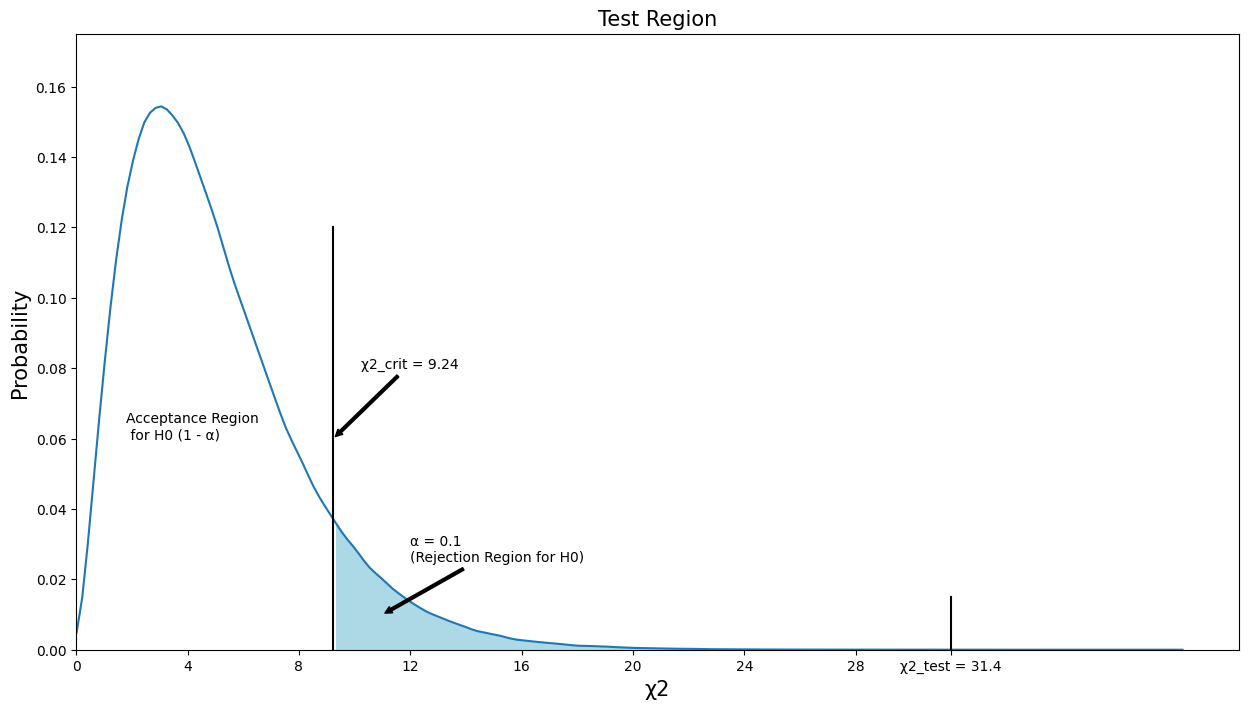

In [12]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = 5, size = 1000000, random_state = 4)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.175)

# set the left side limit for x-axis
plt.xlim(0)

# use 'stats.chi2.isf()' to calculate the critical value for alpha = 0.1
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter 'df' 
chi2 = stats.chi2.isf(q = 0.1, df = 5)

# plot a vertical line at χ2-value
x, y = [chi2, chi2], [0, 0.12]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [test_stat, test_stat], [0, 0.015]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2], y1[x1 >= chi2], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'α = 0.1\n(Rejection Region for H0)', xy = (11, 0.01), xytext = (12, 0.025), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'χ2_crit = '+ str(round(chi2,2)), xy = (chi2, 0.06), xytext = (chi2+1, 0.08), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 1.8, y = 0.06, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [0, 4, 8, 12, 16, 20, 24, 28, round(test_stat,2)], 
           labels = [0, 4, 8, 12, 16, 20, 24, 28, 'χ2_test = '+str(round(test_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the rejection region, which implies that we reject $H_{0}$.

#### 2. At an emporium, the manager is interested in knowing the age group which visits the mall during the day. He defines categories as - children, teenagers, adults and senior citizens. He plans to have his inventory of goods accordingly. He claims that out of all the people who visited 5% are children, 38% are teenagers, 2% are senior citizens are remaining are adults. From a sample of 180 people, it was seen that 25 were children, 50 were teenagers, 90 were adults and  15 were senior citizens. Test the manager’s claim at a 95% confidence level.


The null and alternative hypothesis is:

H<sub>0</sub>: The manager's claim is correct <br>
H<sub>1</sub>: The manager's claim is not correct

For ⍺ = 0.05 and degrees of freedom = 3, calculate the critical value.

In [13]:
# calculate the χ2-value for 90% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.1
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 3), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 7.8147


i.e. if the chi-square value is greater than 7.8147 then we reject the null hypothesis.

In [14]:
# given observed values
observed_value = [25, 50, 90, 15]

# expected count 
exp_count = [0.05, 0.38, 0.55, 0.02]

# calculate the expected values for each category
# expected_value = (np.array(exp_count) * 180) 
expected_value = [9, 68, 99, 4]

# use the 'chisquare()' to perform the goodness of fit test
# the function returns the test statistic value and corresponding p-value
# pass the observed values to the parameter, 'f_obs'
# pass the expected values to the parameter, 'f_exp'
stat, p_value = chisquare(f_obs = observed_value, f_exp = expected_value)

print('Test statistic:', stat)
print('p-value:', p_value)

Test statistic: 64.2773321449792
p-value: 7.160266387019384e-14


The above output shows that the chi-square test statistic is greater than 7.8147 and the p-value is less than 0.05. Thus, we reject the null hypothesis and conclude that manager's claim is not correct.

<a id="ind"></a>
## 2.2 Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

Consider a categorical variable `A` with `r` levels and variable `B` with `c` levels. Let us test the independence of variables A and B.

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \sum_{i= 1}^{r}\sum_{j = 1}^{c}\frac{O_{ij}^{2}}{E_{ij}} - N$</strong></p>

Where, <br>
$O_{ij}$: Observed frequency for category (i,j) <br>
$E_{ij}$: Expected frequency for category (i,j)<br>
$N$: Total number of observations

Under $H_{0}$, the test statistic follows a chi-square distribution with $(r-1)(c-1)$ degrees of freedom.

### Example:

#### 1. Check if there is any relationship between the gender and education level of students with 95% confidence. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [15]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


The null and alternative hypothesis is:

H<sub>0</sub>: The variables gender and education are independent<br>
H<sub>1</sub>: The variables gender and education are not independent

In [16]:
# use 'crosstab()' to create a table for each education level and corresponding gender count 
table = pd.crosstab(df_student['gender'], df_student['education'])

# observed values  
observed_value = table.values
observed_value

array([[ 91, 116,  63, 117,  94,  36],
       [ 88, 106,  55, 108, 103,  23]])

For ⍺ = 0.05 and degrees of freedom = 5, calculate the critical value.

In [17]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 5), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 11.0705


i.e. if the chi-square value is greater than 11.0705 then we reject the null hypothesis.

In [18]:
# use the 'chi2_contingency()' to check the independence of variables
# the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
# pass the observed values to the parameter, 'observed'
# 'correction = False' will not apply the Yates' correction
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 3.5267538812534243
p-value: 0.6193433487137843
Degrees of freedom: 5
Expected values: [[ 92.543 114.774  61.006 116.325 101.849  30.503]
 [ 86.457 107.226  56.994 108.675  95.151  28.497]]


The above output shows that the chi-square test statistic is less than 11.0705 and the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables `gender` and `education` are independent.

Let us plot the acceptance and rejection region for a test with 95% confidence.

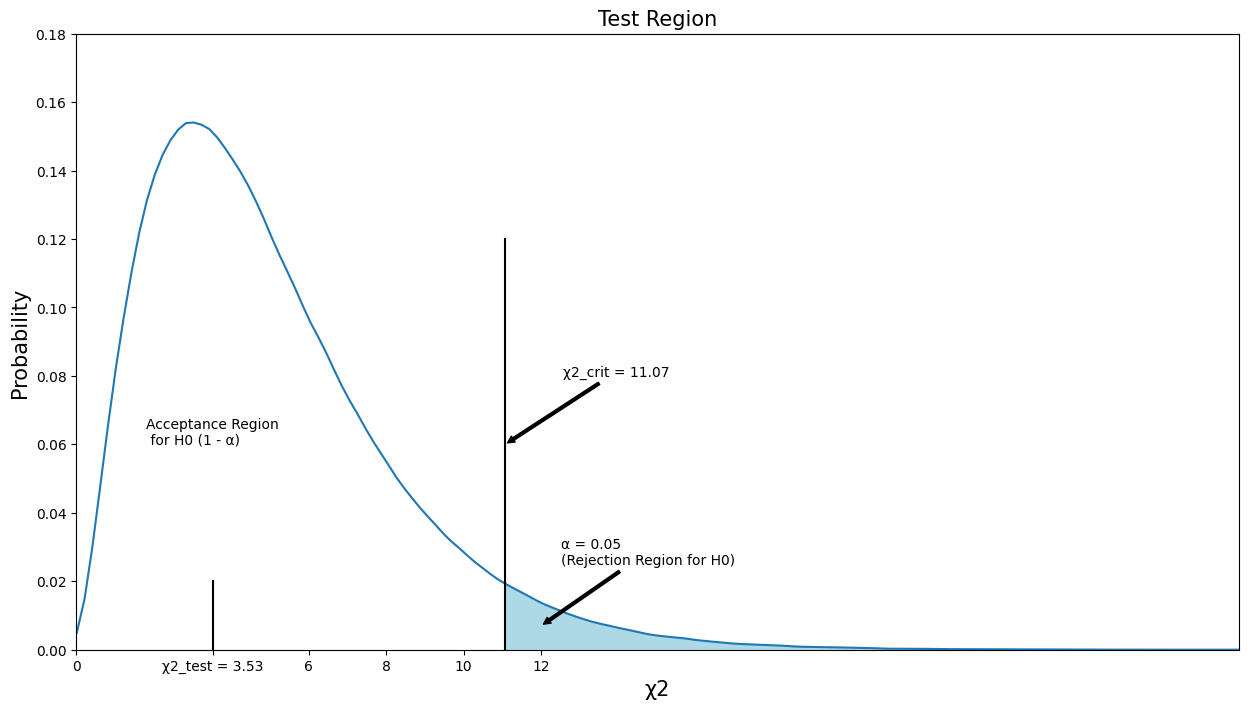

In [19]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = 5, size = 1000000, random_state = 12)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.18)

# set the limit for x-axis
plt.xlim(0, 30)

# use 'stats.chi2.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter 'df' 
chi2 = stats.chi2.isf(q = 0.05, df = 5)

# plot a vertical line at χ2-value
x, y = [chi2, chi2], [0, 0.12]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [test_stat, test_stat], [0, 0.02]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2], y1[x1 >= chi2], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'α = 0.05\n(Rejection Region for H0)', xy = (12, 0.007), xytext = (12.5, 0.025), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'χ2_crit = '+ str(round(chi2,2)), xy = (chi2, 0.06), xytext = (chi2+1.5, 0.08), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 1.8, y = 0.06, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [0, 6, 8, 10, 12, round(test_stat,2)], 
           labels = [0, 6, 8, 10, 12, 'χ2_test = '+str(round(test_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, which implies that we fail to reject (i.e. accept) $H_{0}$.

#### 2. A study was conducted to test the effect of the malaria parasite - plasmodium falciparum - on heterozygous and homozygous humans. The vaccine was given to a cohort of 252 humans. Test whether the heterozygous humans are better protected than homozygous. Consider 0.05 as a level of significance.

<img src='chi2_ind.png'>

The null and alternative hypothesis is:

H<sub>0</sub>: The zygote type and infection with malaria parasite is independent<br>
H<sub>1</sub>: The zygote type and infection with malaria parasite is not independent

In [20]:
# observed values  
observed_value = np.array([[93, 51], [68, 40]])

For ⍺ = 0.05 and degrees of freedom = 1, calculate the critical value.

In [21]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 1), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 3.8415


i.e. if the chi-square value is greater than 3.8415 then we reject the null hypothesis.

In [22]:
# use the 'chi2_contingency()' to check the independence of variables
# the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
# pass the observed values to the parameter, 'observed'
# 'correction = False' will not apply the Yates' correction
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

# print the output
print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 0.07023411371237459
p-value: 0.790996215494177
Degrees of freedom: 1
Expected values: [[92. 52.]
 [69. 39.]]


The above output shows that the chi-square test statistic is less than 3.8415 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the zygote type and infection of the malaria parasite are independent.

<a id="var"></a>
## 2.3 Chi-Square Test for Equality of Variance

This test is used to test whether the population variance ($\sigma^{2}$) is equal to a specific value ($\sigma_{0}^{2}$). Consider that the population mean ($\mu$) is known.

<p style='text-indent:20em'> <strong> $H_{0}$: $\sigma^{2} = \sigma^{2}_{0}$ or $\sigma^{2} \geq \sigma^{2}_{0}$ or $\sigma^{2} \leq \sigma^{2}_{0}$  </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: $\sigma^{2} \neq \sigma^{2}_{0}$ or $\sigma^{2} < \sigma^{2}_{0}$ or $\sigma^{2} > \sigma^{2}_{0}$  </strong></p>

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \frac{\sum_{i= 1}^{n}(x_{i} - \mu)^{2}}{\sigma_{0}^{2}}$</strong></p>

Where, <br>
$\mu$: Population mean<br>
$n$: Sample size

Under $H_{0}$, the test statistic follows a chi-square distribution with $n$ degrees of freedom.

If the population mean ($\mu$) is unknown, use sample mean ($\bar{x}$) instead of $\mu$. In this case, the test statistic follows a chi-square distribution with $n-1$ degrees of freedom.

### Example:

#### 1. The state board of studies has a record of marks for all the students. The committee of basic sciences wants to check if the variance in the mathematics score is 130 or not. A sample of 55 students is collected from two different institutes. Perform a two-tailed chi-square test with a 5% level of significance.

Use the dataset of students available in the CSV file `chisq_var.csv`.

In [23]:
# read the students performance data 
df_student = pd.read_csv('chisq_var.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group C,associate's degree,free/reduced,none,76,65,80,221,Nature Learning
1,male,group D,high school,standard,none,63,71,51,185,Nature Learning


The null and alternative hypothesis is:

H<sub>0</sub>: $\sigma^{2} = 130$<br>
H<sub>1</sub>: $\sigma^{2} \neq 130$

In [24]:
# hypothesized variance
sig_2 = 130

# sample size
n = len(df_student)

# the population mean is unknown, use sample mean
samp_mean = np.mean(df_student['math_score'])

# degrees of freedom
print('Degrees of freedom:', n-1)

Degrees of freedom: 54


As chi-square distribution is not symmetric, we calculate the critical value for the left and right tail separately for a two-tailed test.

For ⍺ = 0.05 and degrees of freedom = 54, calculate the critical value for the left-tail.

In [25]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.ppf()' to find the χ2-value corresponding to the lower tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', for left-tail
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val_left = np.abs(round(stats.chi2.ppf(q = 0.05/2, df = 54), 4))

print('Critical value for chi-square test:', chi2_val_left)

Critical value for chi-square test: 35.5863


i.e. if the chi-square value is less than 35.5863 then we reject the null hypothesis.

For ⍺ = 0.05 and degrees of freedom = 54, calculate the critical value for the right-tail.

In [26]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.ppf()' to find the χ2-value corresponding to the lower tail probability 'q'
# pass the value of '1 - alpha/2' to the parameter 'q', for right-tail
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val_right = np.abs(round(stats.chi2.ppf(q = (1 - 0.05/2), df = 54), 4))

print('Critical value for chi-square test:', chi2_val_right)

Critical value for chi-square test: 76.192


i.e. if the chi-square value is greater than 76.192 then we reject the null hypothesis.

In [27]:
# calculate the test statistic
chi_test = (np.sum((df_student['math_score'] - samp_mean)**2)) / sig_2

# print the test statistic
print('Test Statistic:', chi_test)

Test Statistic: 59.87636363636363


In [28]:
# calculate P(X > chi_test)
# pass the test statistic value to 'x'
# pass the degrees of freedom to 'df'
p_val = stats.chi2.sf(x = chi_test, df = 54)

# print the p-value
print('p-value:', p_val)

p-value: 0.27099758895862275


The above output shows that the chi-square test statistic is less than 76.192 and greater than 35.5863, the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the population variance is not equal to 130.

Let us plot the acceptance and rejection region for a test with 95% confidence.

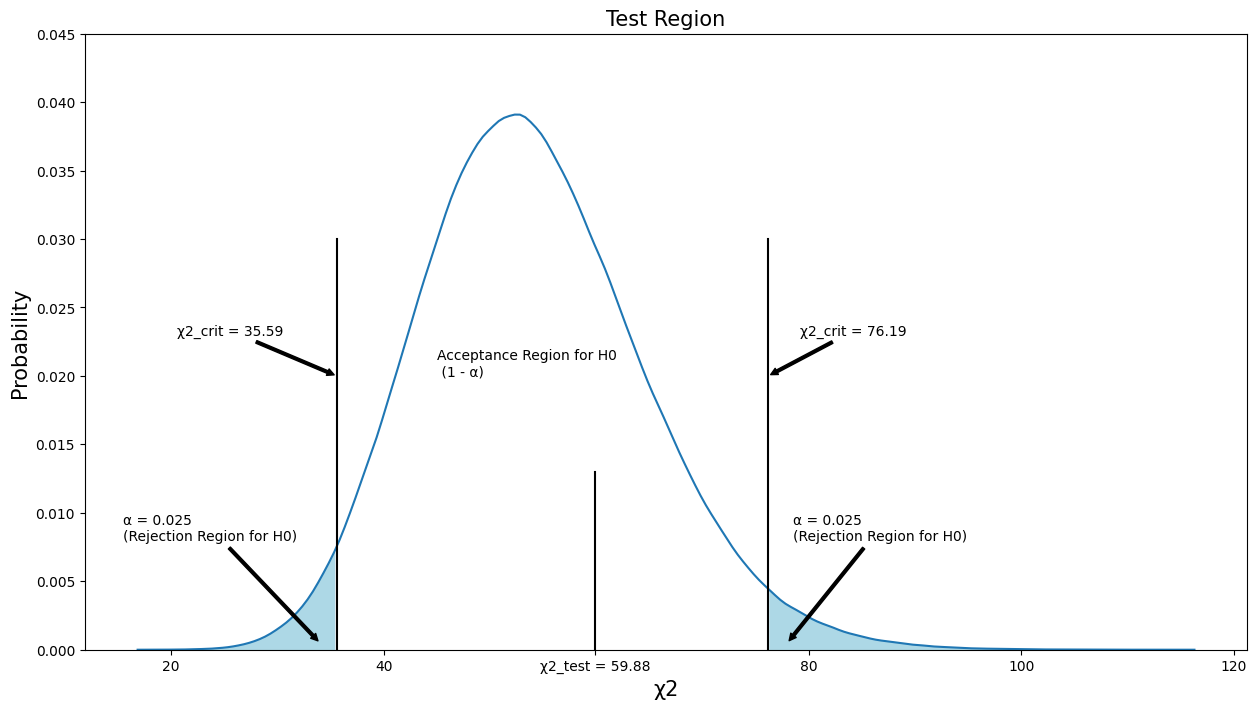

In [29]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = 54, size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.045)

# plot a vertical line at χ2-value for right-tail
x, y = [chi2_val_right, chi2_val_right], [0, 0.03]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2-value for left-tail
x, y = [chi2_val_left, chi2_val_left], [0, 0.03]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [chi_test, chi_test], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value for right-tail and left of the χ2-value for left-tail
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value for right-tail
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2_val_right], y1[x1 >= chi2_val_right], color = 'lightblue')

# fill the color for the region where x-values are less than the critical χ2-value for left-tail
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= chi2_val_left], y1[x1 <= chi2_val_left], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'α = 0.025\n(Rejection Region for H0)', xy = (78, 0.0005), xytext = (78.5, 0.008), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α = 0.025\n(Rejection Region for H0)', xy = (34, 0.0005), xytext = (15.5, 0.008), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'χ2_crit = '+ str(round(chi2_val_right,2)), xy = (chi2_val_right, 0.02), xytext = (chi2_val_right+3, 0.023), 
            arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'χ2_crit = '+ str(round(chi2_val_left,2)), xy = (chi2_val_left, 0.02), xytext = (chi2_val_left-15, 0.023), 
            arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 45, y = 0.02, s = 'Acceptance Region for H0 \n (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [20, 40, 80, 100, 120, round(chi_test,2)], 
           labels = [20, 40, 80, 100, 120, 'χ2_test = '+str(round(chi_test,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, which implies that we fail to reject (i.e. accept) $H_{0}$.

#### 2. At a dairy, the milk is usually supplied in bottles. The manager does not want to exceed the variance of litres of milk cans to 0.26 squarelitres. Some of  the following data gives the litres of milk in the cans. Write the null and the alternative hypothesis. Test whether the variance of litres of milk cans is more than 0.26 squarelitres at 5% level of significance.

Given data:

        milk_lit = [1.5, 1.3, 1.5, 1.5, 1.4, 1.7, 1.6, 1.2]

The null and alternative hypothesis is:

H<sub>0</sub>: $\sigma^{2} \leq 0.26$<br>
H<sub>1</sub>: $\sigma^{2} > 0.26$

In [30]:
# given data
milk_lit = [1.5, 1.3, 1.5, 1.5, 1.4, 1.7, 1.6, 1.2]

# hypothesized variance
sig_2 = 0.26

# sample size
n = len(milk_lit)

# the population mean is unknown, use sample mean
samp_mean = np.mean(milk_lit)

# degrees of freedom
print('Degrees of freedom:', n-1)

Degrees of freedom: 7


For ⍺ = 0.05 and degrees of freedom = 7, calculate the critical value for the right-tail.

In [31]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of '1 - alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 1 - 0.05, df = 7), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 2.1673


i.e. if the chi-square value is greater than 2.1673 then we reject the null hypothesis.

In [32]:
# calculate the test statistic
chi_test = (np.sum((milk_lit - samp_mean)**2)) / sig_2

# print the test statistic
print('Test Statistic:', chi_test)

Test Statistic: 0.6875


In [33]:
# calculate P(X > chi_test)
# pass the test statistic value to 'x'
# pass the degrees of freedom to 'df'
p_val = stats.chi2.sf(x = chi_test, df = 7)

# print the p-value
print('p-value:', p_val)

p-value: 0.998429948137378


The above output shows that the chi-square test statistic is less than 2.1673, the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variance of litres of milk cans is less than 0.26 squarelitres.